Importing Libraries and Datasets
The libraries used are :

Pandas:  This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.
Seaborn/Matplotlib: For data visualization.
Numpy: Numpy arrays are very fast and can perform large computations in a very short time.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
from google.colab import files


uploaded = files.upload()


Saving data.csv to data.csv


The dataset includes the features like type of payment, Old balance , amount paid, name of the destination, etc.

In [ ]:
data = pd.read_csv('data.csv')
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


To print the information of the data we can use data.info() command.

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            1999 non-null   int64  
 1   type            1999 non-null   object 
 2   amount          1999 non-null   float64
 3   nameOrig        1999 non-null   object 
 4   oldbalanceOrg   1999 non-null   float64
 5   newbalanceOrig  1999 non-null   float64
 6   nameDest        1999 non-null   object 
 7   oldbalanceDest  1999 non-null   float64
 8   newbalanceDest  1999 non-null   float64
 9   isFraud         1999 non-null   int64  
 10  isFlaggedFraud  1999 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 171.9+ KB


Let’s see the mean, count , minimum and maximum values of the data.

In [ ]:
data.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1999.0,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1999.000000,1999.0
mean,1.0,1.111202e+05,7.773706e+05,7.918626e+05,6.897785e+05,1.016506e+06,0.007004,0.0
std,0.0,2.595564e+05,1.950349e+06,1.991423e+06,2.127046e+06,3.013263e+06,0.083414,0.0
min,1.0,8.730000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.0,3.977375e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,1.0,1.049733e+04,1.891368e+04,8.878280e+03,0.000000e+00,0.000000e+00,0.000000,0.0
75%,1.0,1.234885e+05,1.097145e+05,1.032730e+05,3.637706e+05,2.907726e+05,0.000000,0.0
max,1.0,3.776389e+06,1.010000e+07,1.020000e+07,1.940000e+07,1.920000e+07,1.000000,0.0


Data Visualization
In this section, we will try to understand and compare all columns.

Let’s count the columns with different datatypes like Category, Integer, Float.

In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 3
Float variables: 5


Let’s see the count plot of the Payment type column using Seaborn library.

<Axes: xlabel='type', ylabel='count'>

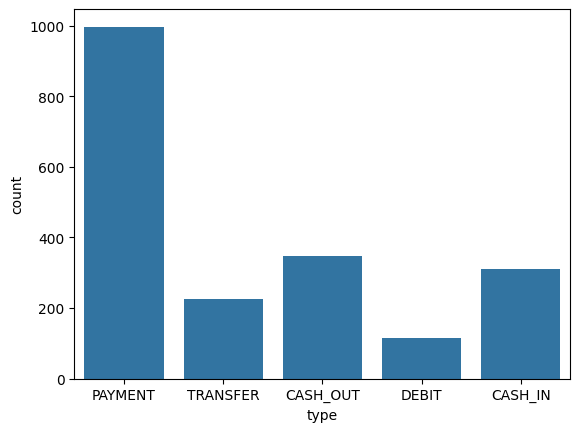

In [ ]:
sns.countplot(x='type', data=data)


We can also use the bar plot for analyzing Type and amount column simultaneously.

<Axes: xlabel='type', ylabel='amount'>

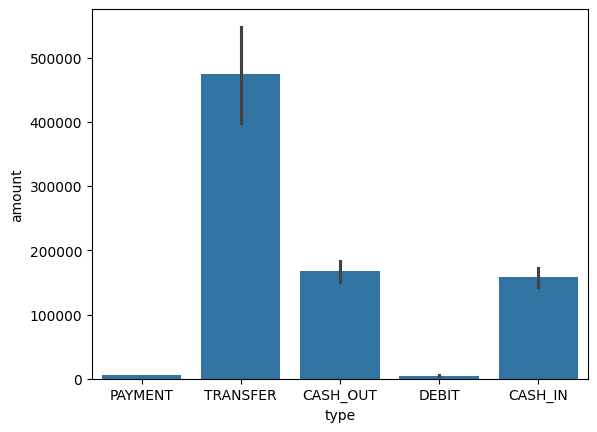

In [ ]:
sns.barplot(x='type', y='amount', data=data)


Both the graph clearly shows that mostly the type cash_out and transfer are maximum in count and as well as in amount.

Let’s check the distribution of data among both the prediction values.

In [ ]:
data['isFraud'].value_counts()


,count
isFraud,
0,1985
1,14


The dataset is already in same count. So there is no need of sampling.

Now let’s see the distribution of the step column using distplot.

<ipython-input-10-d1bba932735e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'], bins=50)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='step', ylabel='Density'>

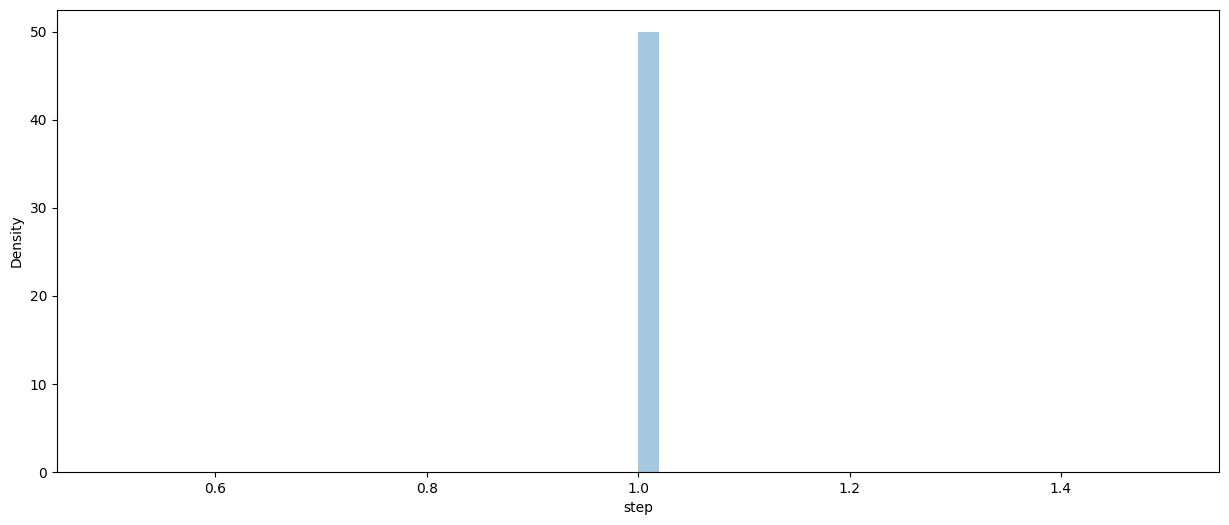

In [ ]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)


Data Preprocessing
This step includes the following :

Encoding of Type column
Dropping irrelevant columns like nameOrig, nameDest
Data Splitting

In [ ]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,True,False


Once we done with the encoding, now we can drop the irrelevant columns. For that, follow the code given below.

In [ ]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']


Let’s check the shape of extracted data.

In [ ]:
X.shape, y.shape


((1999, 11), (1999,))

Now let’s split the data into 2 parts : Training and Testing.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=42)


Model Training
As the prediction is a classification problem so the models we will be using are :

LogisticRegression :  It predicts that the probability of a given data belongs to the particular category or not.
XGBClassifier : It refers to Gradient Boosted decision trees. In this algorithm, decision trees are created in sequential form and weights are assigned to all the independent variables which are then fed into the decision tree which predicts results.
SVC : SVC is used to find a hyperplane in an N-dimensional space that distinctly classifies the data points. Then it gives the output according the most nearby element.
RandomForestClassifier : Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. Then, it collects the votes from different decision trees to decide the final prediction.
Let’s import the modules of the relevant models.



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


Once done with the importing, Let’s train the model.

In [ ]:
models = [LogisticRegression(), XGBClassifier(),
		SVC(kernel='rbf', probability=True),
		RandomForestClassifier(n_estimators=7,
								criterion='entropy',
								random_state=7)]

for i in range(len(models)):
	models[i].fit(X_train, y_train)
	print(f'{models[i]} : ')

	train_preds = models[i].predict_proba(X_train)[:, 1]
	print('Training Accuracy : ', ras(y_train, train_preds))

	y_preds = models[i].predict_proba(X_test)[:, 1]
	print('Validation Accuracy : ', ras(y_test, y_preds))
	print()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() : 
Training Accuracy :  0.9069295258056065
Validation Accuracy :  0.9966499162479063

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.9916247906197654

SVC(probability=True) : 
Training Accuracy :  0.8632433848572177

In [ ]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 55.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
pip install --upgrade scikit-learn

Model Evaluation
The best-performed model is XGBClassifier. Let’s plot the Confusion Matrix for the same.

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(models[1], X_test, y_test)
plt.show()
